In [419]:
import umap
import gzip

import pandas as pd
import numpy as np

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA, NMF
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler



from matplotlib import pyplot as plt

# Preprocessing

### RefSeq level

In [2]:
rna = pd.read_table("../rawData/GSE62564_SEQC_NB_RNA-Seq_log2RPM.txt.gz")

In [3]:
rna.shape

(43827, 499)

In [4]:
rna.head()

,RefSeqID,SEQC_NB001,SEQC_NB002,SEQC_NB003,SEQC_NB004,SEQC_NB005,SEQC_NB006,SEQC_NB007,SEQC_NB008,SEQC_NB009,...,SEQC_NB489,SEQC_NB490,SEQC_NB491,SEQC_NB492,SEQC_NB493,SEQC_NB494,SEQC_NB495,SEQC_NB496,SEQC_NB497,SEQC_NB498
0,NM_000014,7.211,7.179,7.478,8.124,7.694,7.356,9.059,7.287,7.243,...,7.331,8.901,7.127,8.052,7.308,8.985,8.760,7.968,8.687,9.603
1,NM_000015,-4.396,-6.665,-4.385,-2.991,-2.371,-4.233,-3.650,-6.665,-2.700,...,-6.665,-6.665,-6.665,-4.029,-5.430,-4.264,-4.316,-4.924,-4.998,-4.343
2,NM_000016,5.144,4.812,3.962,5.434,4.109,4.772,5.152,5.121,4.123,...,3.395,4.230,5.008,3.862,5.443,4.976,5.242,4.989,4.915,5.014
3,NM_000017,3.537,2.551,2.365,3.403,2.208,3.867,3.059,1.859,2.830,...,1.841,3.230,3.031,2.328,3.424,3.236,2.923,3.061,2.577,3.441
4,NM_000018,6.783,7.138,6.283,6.244,6.363,7.264,6.751,5.860,6.793,...,6.032,6.464,6.565,6.307,7.273,7.428,7.297,7.540,7.629,6.959


In [5]:
X = rna.iloc[:,1:].transpose()

In [6]:
X.columns = rna.RefSeqID

In [7]:
X.head()

RefSeqID,NM_000014,NM_000015,NM_000016,NM_000017,NM_000018,NM_000019,NM_000020,NM_000021,NM_000022,NM_000023,...,XR_133567,XR_133568,XR_133569,XR_133570,XR_133571,XR_133572,XR_133573,XR_133574,XR_133575,XR_133576
SEQC_NB001,7.211,-4.396,5.144,3.537,6.783,3.650,4.124,5.951,2.740,-1.811,...,-6.665,-6.665,-6.665,-1.280,-4.981,-0.489,0.902,-0.050,-6.665,-4.396
SEQC_NB002,7.179,-6.665,4.812,2.551,7.138,4.014,3.093,5.889,1.630,-4.186,...,-6.665,-6.665,-6.665,-0.449,-4.771,-0.913,0.136,-0.043,-6.665,-3.186
SEQC_NB003,7.478,-4.385,3.962,2.365,6.283,5.190,3.044,5.491,0.506,-1.510,...,-6.665,-6.665,-6.665,-1.112,-3.648,-0.926,0.659,-0.137,-6.665,-6.665
SEQC_NB004,8.124,-2.991,5.434,3.403,6.244,5.360,3.592,5.944,1.452,-2.821,...,-6.665,-4.991,-6.665,-1.468,-4.406,-0.468,0.198,0.075,-4.991,-3.991
SEQC_NB005,7.694,-2.371,4.109,2.208,6.363,4.994,4.599,5.407,1.964,0.924,...,-6.665,-6.665,-6.665,-1.076,-3.831,-1.509,-0.103,-0.307,-4.831,-6.665


In [9]:
X_train, X_test = train_test_split(X, test_size=0.2, random_state=1234)

### Gene level

In [91]:
rna = pd.read_table("../rawData/GSE49711_SEQC_NB_TAV_G_log2.final.txt.gz")

In [92]:
rna.shape

(55945, 506)

In [93]:
rna = rna[~ rna.Gene.str.contains("[a-z]")]

In [94]:
rna.shape

(21123, 506)

In [95]:
rna.drop(["Gene_set","NCBI_gene_ID","RefSeq_transcript_ID","Chromosome","Strand","Start","End"], axis=1, inplace=True)

In [96]:
rna.shape

(21123, 499)

In [97]:
rna.head()

,Gene,SEQC_NB001,SEQC_NB002,SEQC_NB003,SEQC_NB004,SEQC_NB005,SEQC_NB006,SEQC_NB007,SEQC_NB008,SEQC_NB009,...,SEQC_NB489,SEQC_NB490,SEQC_NB491,SEQC_NB492,SEQC_NB493,SEQC_NB494,SEQC_NB495,SEQC_NB496,SEQC_NB497,SEQC_NB498
1,A1BGAS,17.2744,15.3742,16.5654,17.3721,17.1646,16.6288,16.9432,16.8992,15.9093,...,16.8690,16.7470,15.6558,16.7318,16.6318,16.4946,16.8059,16.2498,17.6346,16.8966
2,A1CF,8.7985,0.0000,0.0000,0.0000,11.5568,0.0000,0.0000,0.0000,0.0000,...,0.0000,10.8696,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,11.4219,0.0000
3,A2BP1,16.8905,18.6162,13.6178,18.7216,16.1014,18.4749,20.1213,15.8412,19.3147,...,14.9643,16.0162,15.5955,15.4929,17.4806,20.0256,19.4085,19.4109,20.0640,19.3468
4,A2LD1,13.8812,14.0487,15.4478,14.9932,14.8793,14.1639,15.1683,13.7764,13.9263,...,13.9839,16.1991,14.4934,15.0323,15.1812,14.7423,14.6655,13.7998,15.1968,14.5997
5,A2M,19.9015,19.9509,20.2341,20.8824,20.5563,19.9256,21.7648,20.0818,20.2981,...,20.1619,21.5522,19.9990,20.8131,20.0009,21.6698,21.4414,20.6419,21.4051,22.2634


In [98]:
X = rna.iloc[:,1:].transpose()
X.columns = rna.Gene

In [99]:
X.head()

Gene,A1BGAS,A1CF,A2BP1,A2LD1,A2M,A2ML1,A2MP1,A4GALT,A4GNT,AAA1,...,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11AP1,ZYG11B,ZYX,ZZEF1,ZZZ3
SEQC_NB001,17.2744,8.7985,16.8905,13.8812,19.9015,13.5771,11.7368,15.1902,10.0039,8.0385,...,19.4584,15.7705,16.8810,18.8151,14.4042,0.0000,19.4190,19.5751,18.8784,18.9284
SEQC_NB002,15.3742,0.0000,18.6162,14.0487,19.9509,0.0000,0.0000,14.4196,10.2651,8.2949,...,19.4969,15.7086,17.3796,18.2340,11.7821,10.5735,19.7472,19.7795,18.8924,18.6099
SEQC_NB003,16.5654,0.0000,13.6178,15.4478,20.2341,13.6755,12.0816,14.5610,0.0000,0.0000,...,19.1760,15.6557,17.0504,18.2953,8.8015,0.0000,18.3585,19.5918,19.0265,17.8334
SEQC_NB004,17.3721,0.0000,18.7216,14.9932,20.8824,0.0000,10.0860,14.9447,8.9398,0.0000,...,18.4904,15.4299,16.9626,18.0760,10.9891,0.0000,19.7531,20.7385,19.0716,18.5571
SEQC_NB005,17.1646,11.5568,16.1014,14.8793,20.5563,0.0000,0.0000,15.5075,9.2542,0.0000,...,19.3070,14.9897,16.3679,18.1335,9.5609,13.3562,18.4551,19.9873,19.0289,17.7439


In [100]:
X_train, X_test = train_test_split(X, test_size=0.2, random_state=1234)

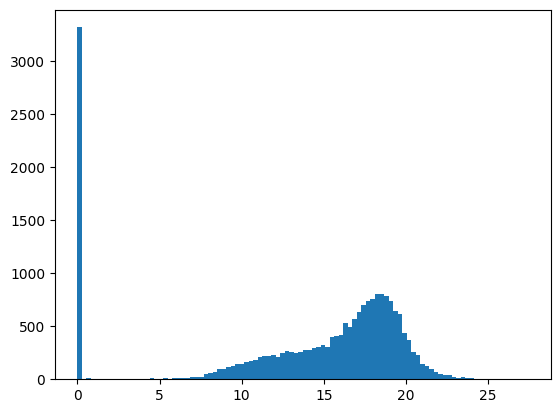

In [570]:
_ = plt.hist(X_train.apply(np.median), bins=100)

In [572]:
X_train = X_train.loc[:, X_train.median() > 5]

In [573]:
X_train.shape

(398, 17709)

## Meta data

In [574]:
def read_geo_series_matrix(file_path):
    cols = {}
    with gzip.open(file_path, 'rt') as f:
        for line in f:
            if line.startswith("!Sample_title"):
                sampleId = [i.strip('"') for i in line.split()[1:]]
                cols["sampleId"] = sampleId
            elif line.startswith("!Sample_characteristics_ch1"):
                _ = line[28:].strip().strip('"').split('"\t"')
                category = _[0].split(": ")[0].replace(" ", "_")
                values = [i.split(": ")[1] for i in _]
                cols.update({category: values})
    
    return pd.DataFrame(cols)

In [575]:
meta = read_geo_series_matrix("../rawData/GSE49711_series_matrix.txt.gz")
meta.index = meta.sampleId

In [576]:
meta

,sampleId,tissue,dataset,Sex,age_at_diagnosis,mycn_status,high_risk,inss_stage,class_label,progression,death_from_disease
sampleId,,,,,,,,,,,
SEQC_NB001,SEQC_NB001,neuroblastoma,1,M,987,0,1,4,1,1,1
SEQC_NB002,SEQC_NB002,neuroblastoma,2,M,1808,0,1,4,1,1,1
SEQC_NB003,SEQC_NB003,neuroblastoma,1,F,625,1,1,4,1,1,1
SEQC_NB004,SEQC_NB004,neuroblastoma,2,F,335,1,1,2,N/A,0,0
SEQC_NB005,SEQC_NB005,neuroblastoma,1,F,536,1,1,4,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
SEQC_NB494,SEQC_NB494,neuroblastoma,2,M,56,0,0,1,0,0,0
SEQC_NB495,SEQC_NB495,neuroblastoma,1,M,163,0,0,1,0,0,0
SEQC_NB496,SEQC_NB496,neuroblastoma,2,M,132,0,0,1,N/A,1,0


# Select highly variable genes

In [577]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, index=X_train.index, columns=X_train.columns)

In [578]:
variance = X_train_scaled.var(axis=0)

In [579]:
variance

Gene
A1BGAS    0.014293
A2BP1     0.017913
A2LD1     0.020525
A2M       0.017133
A2ML1     0.105413
            ...   
ZYG11A    0.063069
ZYG11B    0.032097
ZYX       0.021089
ZZEF1     0.023236
ZZZ3      0.021288
Length: 17709, dtype: float64

In [580]:
np.quantile(variance, q = [0, 0.25, 0.5, 0.75, 1])

array([0.00263148, 0.01855129, 0.02390529, 0.03020887, 0.22542117])

<Axes: >

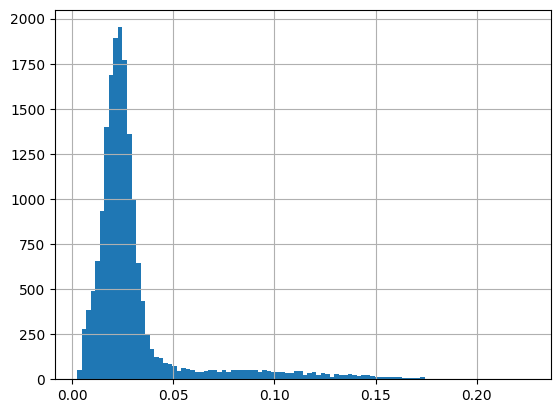

In [581]:
variance.hist(bins=100)

In [582]:
variableFeatures = variance[variance > 0.05]

In [583]:
variableFeatures

Gene
A2ML1      0.105413
A2MP1      0.124842
A4GNT      0.087982
ABCA13     0.091559
ABCB5      0.100279
             ...   
ZPLD1      0.073502
ZSCAN10    0.141700
ZSCAN4     0.091395
ZSWIM2     0.129500
ZYG11A     0.063069
Length: 1918, dtype: float64

In [584]:
X_train_scaled_filtered = X_train_scaled[variableFeatures.index]
print(X_train_scaled_filtered.shape)

(398, 1918)


# Unsupervised clustering

## PCA

In [585]:
pca = PCA(n_components=100, random_state=1234) 
pca.fit(X_train_scaled_filtered)

PCA(n_components=100, random_state=1234)

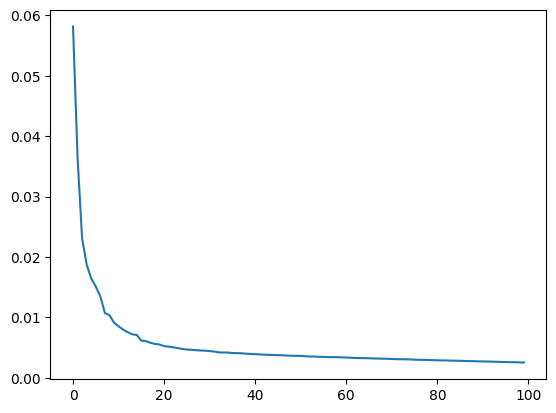

In [586]:
explained_variance_ratio = pca.explained_variance_ratio_
plt.plot(range(100),explained_variance_ratio)

In [589]:
X_train_pc_top30 = pca.transform(X_train_scaled_filtered)[:,0:30]

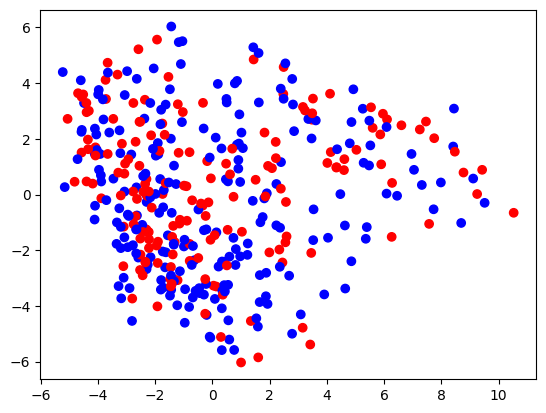

In [591]:
# Sex
plt.scatter(X_train_pc_top30[:,0], X_train_pc_top30[:,1], 
            color = meta.loc[X_train.index].Sex.replace({"M":"blue", "F":"red"}))

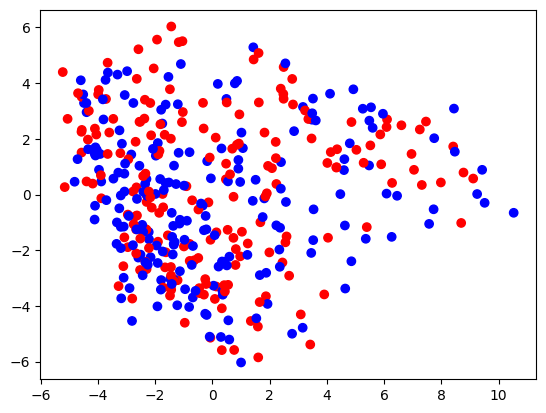

In [592]:
# dataset
plt.scatter(X_train_pc_top30[:,0], X_train_pc_top30[:,1], 
            color = meta.loc[X_train.index].dataset.replace({"1":"blue", "2":"red", "N/A": "grey" }))


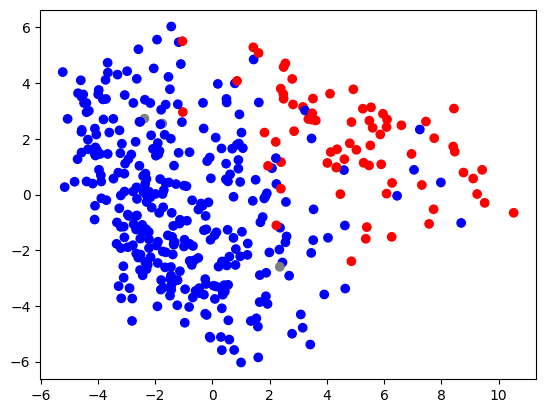

In [593]:
# MYCN
plt.scatter(X_train_pc_top30[:,0], X_train_pc_top30[:,1], 
            color = meta.loc[X_train.index].mycn_status.replace({"0":"blue", "1":"red", "N/A": "grey" }))


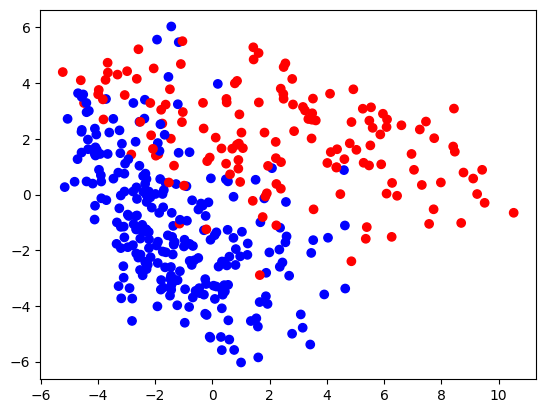

In [594]:
# High risk
plt.scatter(X_train_pc_top30[:,0], X_train_pc_top30[:,1], 
            color = meta.loc[X_train.index].high_risk.replace({"0":"blue", "1":"red", "N/A": "grey" }))


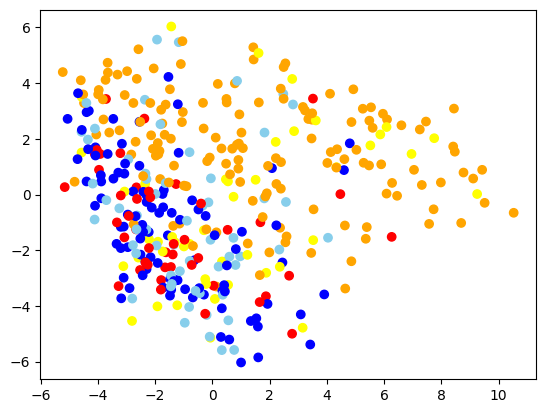

In [595]:
# INSS stage
plt.scatter(X_train_pc_top30[:,0], X_train_pc_top30[:,1], 
            color = meta.loc[X_train.index].inss_stage.replace({"1":"blue", "2":"skyblue", "3": "yellow", "4":"orange", "4S":"red", "N/A": "grey" }))


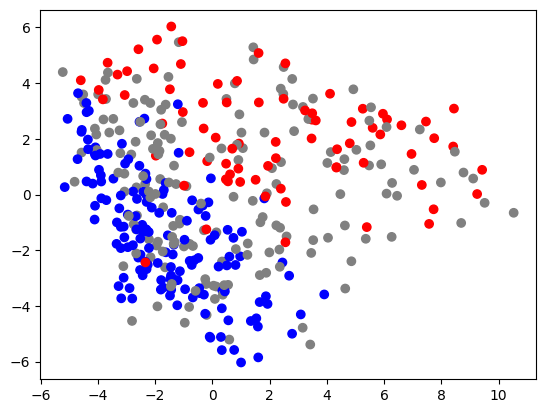

In [596]:
# Class label
plt.scatter(X_train_pc_top30[:,0], X_train_pc_top30[:,1], 
            color = meta.loc[X_train.index].class_label.replace({"0":"blue", "1":"red", "N/A": "grey" }))


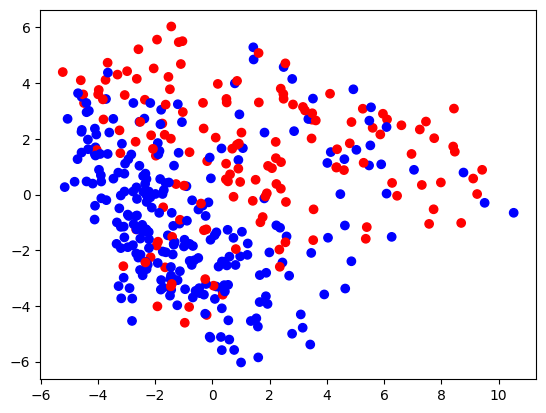

In [597]:
# Progression
plt.scatter(X_train_pc_top30[:,0], X_train_pc_top30[:,1], 
            color = meta.loc[X_train.index].progression.replace({"0":"blue", "1":"red", "N/A": "grey" }))


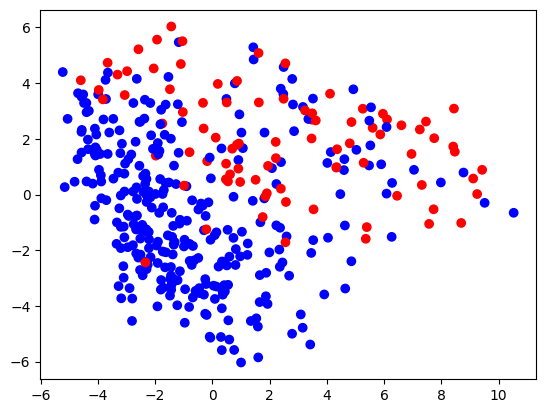

In [598]:
# Death
plt.scatter(X_train_pc_top30[:,0], X_train_pc_top30[:,1], 
            color = meta.loc[X_train.index].death_from_disease.replace({"0":"blue", "1":"red", "N/A": "grey" }))


# UMAP

In [603]:
umap_model = umap.UMAP(n_components=2, random_state=1234, n_neighbors=30, min_dist=0.1)
umap_result = umap_model.fit_transform(X_train_pc_top30)

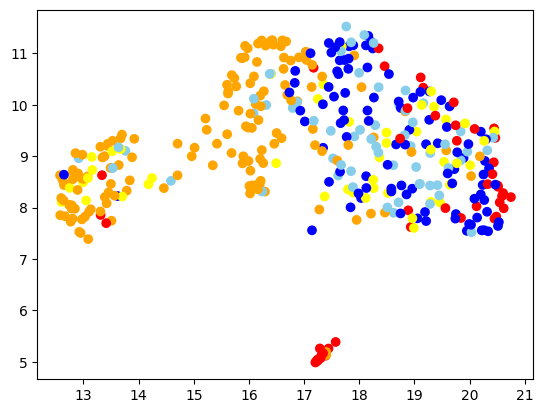

In [604]:
# INSS stage
plt.scatter(umap_result[:,0], umap_result[:,1], 
            color = meta.loc[X_train.index].inss_stage.replace({"1":"blue", "2":"skyblue", "3": "yellow", "4":"orange", "4S":"red", "N/A": "grey" }))

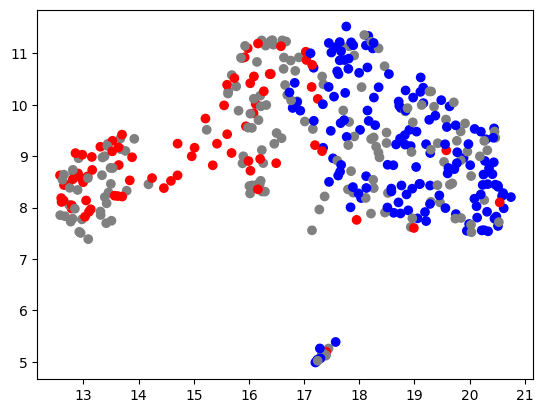

In [605]:
# Class label
plt.scatter(umap_result[:,0], umap_result[:,1], 
            color = meta.loc[X_train.index].class_label.replace({"0":"blue", "1":"red", "N/A": "grey" }))


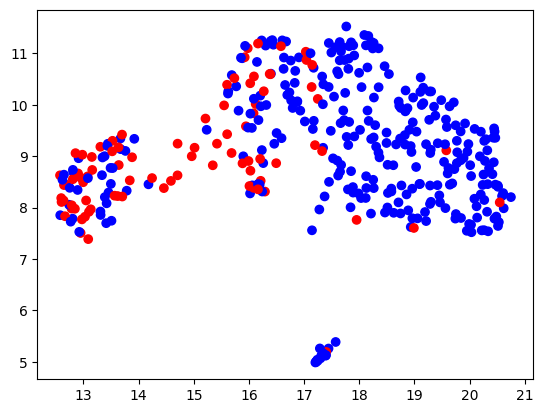

In [606]:
# Death
plt.scatter(umap_result[:,0], umap_result[:,1], 
            color = meta.loc[X_train.index].death_from_disease.replace({"0":"blue", "1":"red", "N/A": "grey" }))


## Find optimal K value for K-Means

In [615]:
k_values = range(2, 10)
k_silhouette = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=1234, n_init = 100, init="k-means++")
    _ = kmeans.fit_predict(X_train_scaled_filtered)
    k_silhouette.append(silhouette_score(X_train_scaled_filtered, _))
    
    print(f"- K = {k}: Silhouette score - {k_silhouette[-1]:.3f}")

- K = 2: Silhouette score - 0.062
- K = 3: Silhouette score - 0.029
- K = 4: Silhouette score - 0.024
- K = 5: Silhouette score - 0.021
- K = 6: Silhouette score - 0.029
- K = 7: Silhouette score - 0.021
- K = 8: Silhouette score - 0.020
- K = 9: Silhouette score - 0.020


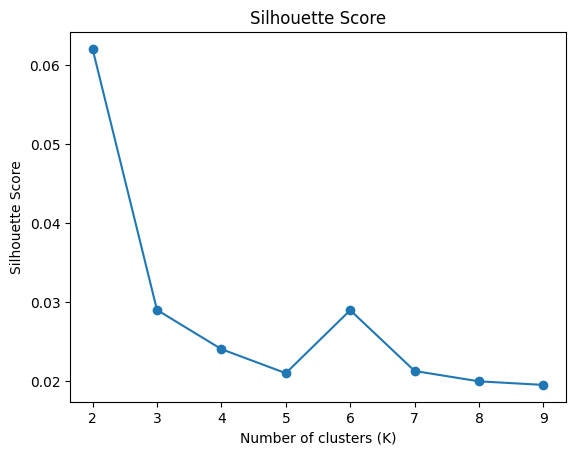

In [616]:
plt.plot(k_values, k_silhouette, marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score')
plt.show()

In [617]:
kmeans = KMeans(n_clusters=2, random_state=1234, n_init = 100, init="k-means++")
_ = kmeans.fit_predict(X_train_scaled_filtered)

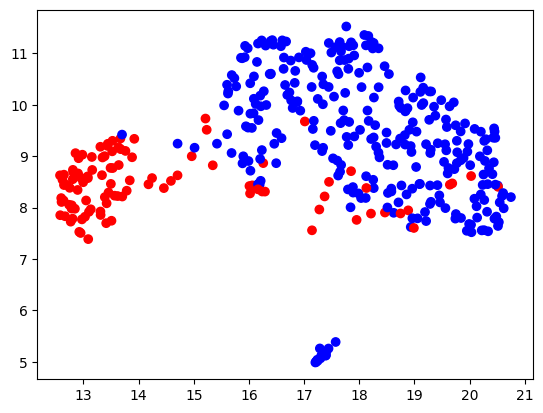

In [624]:
# Kmeans
plt.scatter(umap_result[:,0], umap_result[:,1], 
            color = pd.Series(_).replace({1:"blue", 0:"red", "N/A": "grey" }))


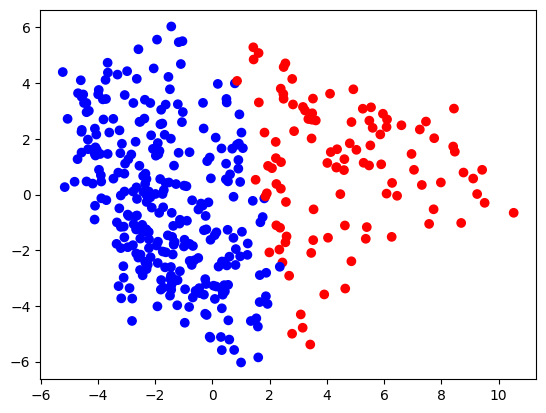

In [625]:
# Death
plt.scatter(X_train_pc_top30[:,0], X_train_pc_top30[:,1], 
            color = pd.Series(_).replace({1:"blue", 0:"red", "N/A": "grey" }))


For n_clusters = 2 The average silhouette_score is : 0.0611232592395551
For n_clusters = 3 The average silhouette_score is : 0.02779112581153037
For n_clusters = 4 The average silhouette_score is : 0.022428855643933186
For n_clusters = 5 The average silhouette_score is : 0.015468835504172274
For n_clusters = 6 The average silhouette_score is : 0.013521874159044952
For n_clusters = 7 The average silhouette_score is : 0.01701464856158076
For n_clusters = 8 The average silhouette_score is : 0.00900308819960545


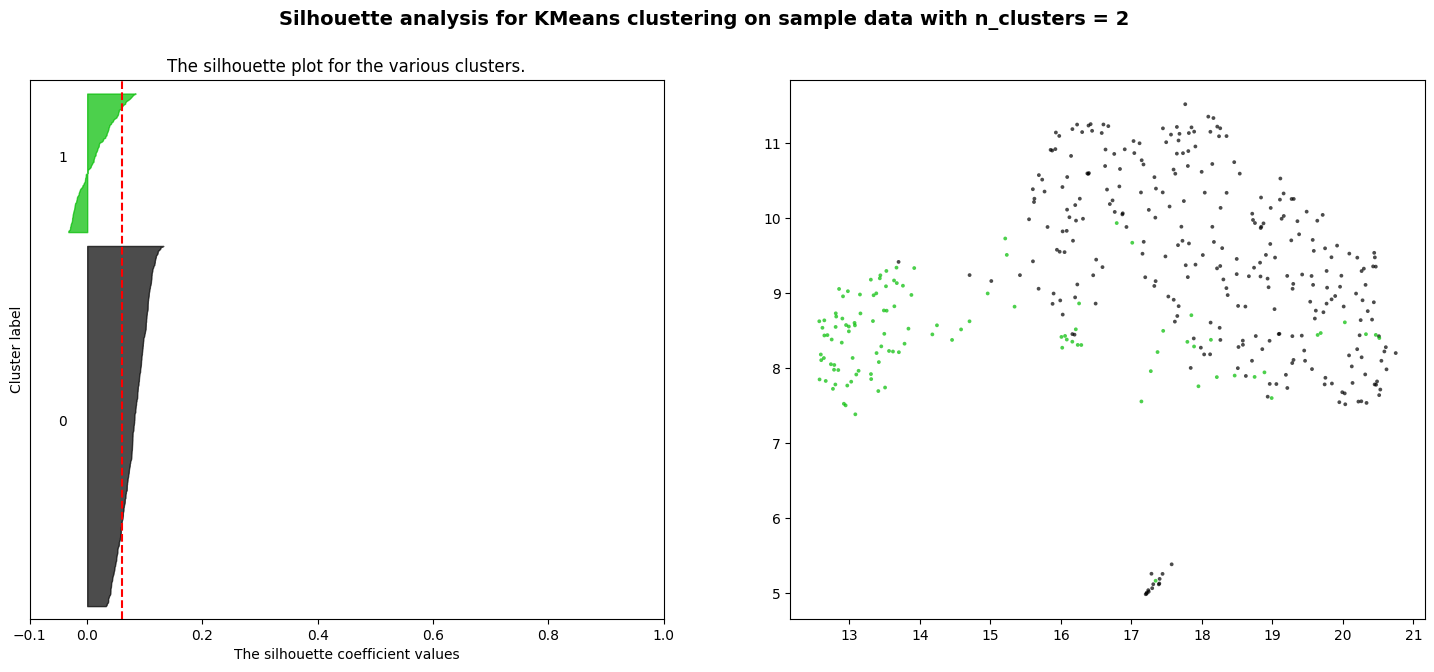

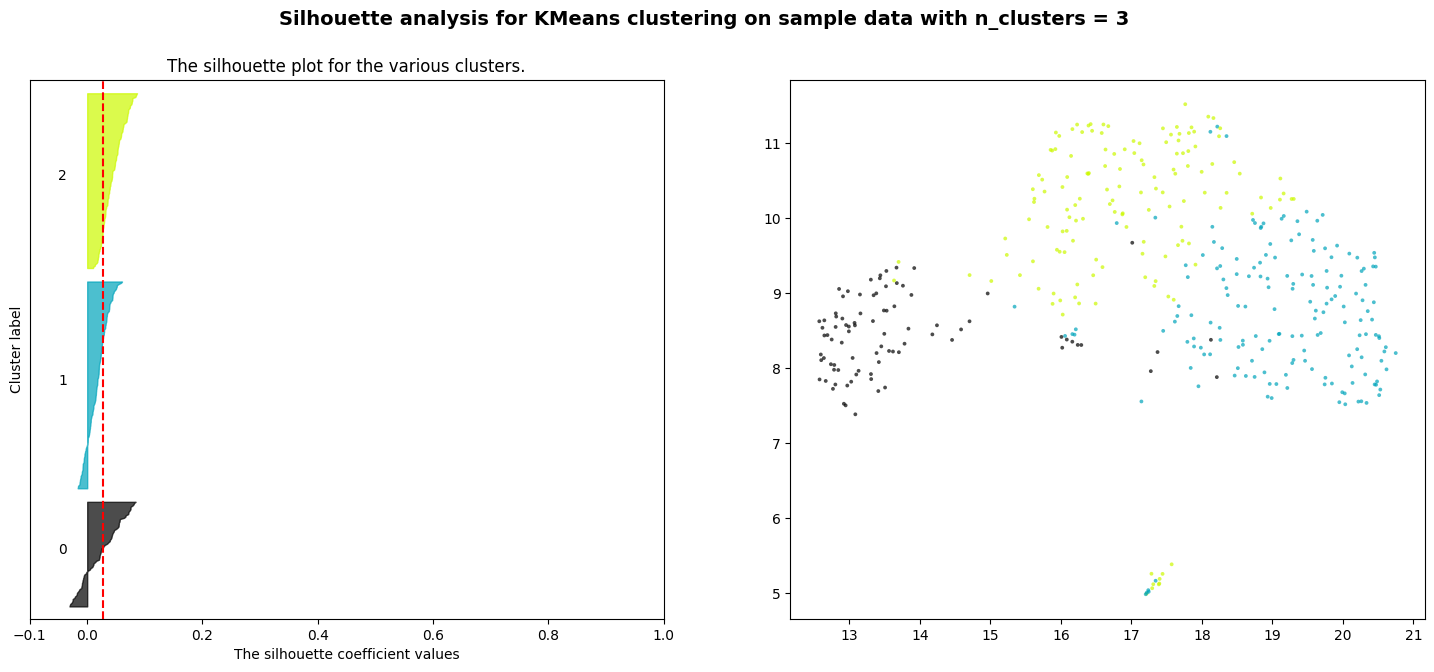

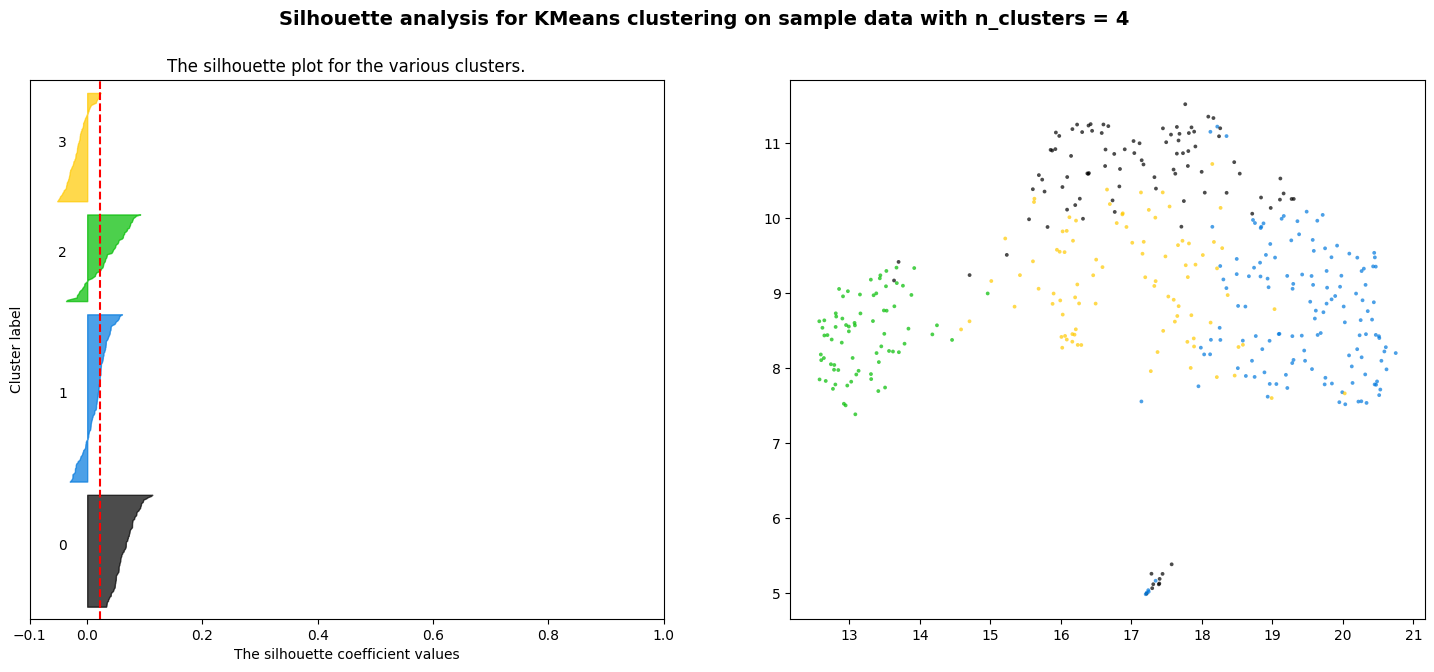

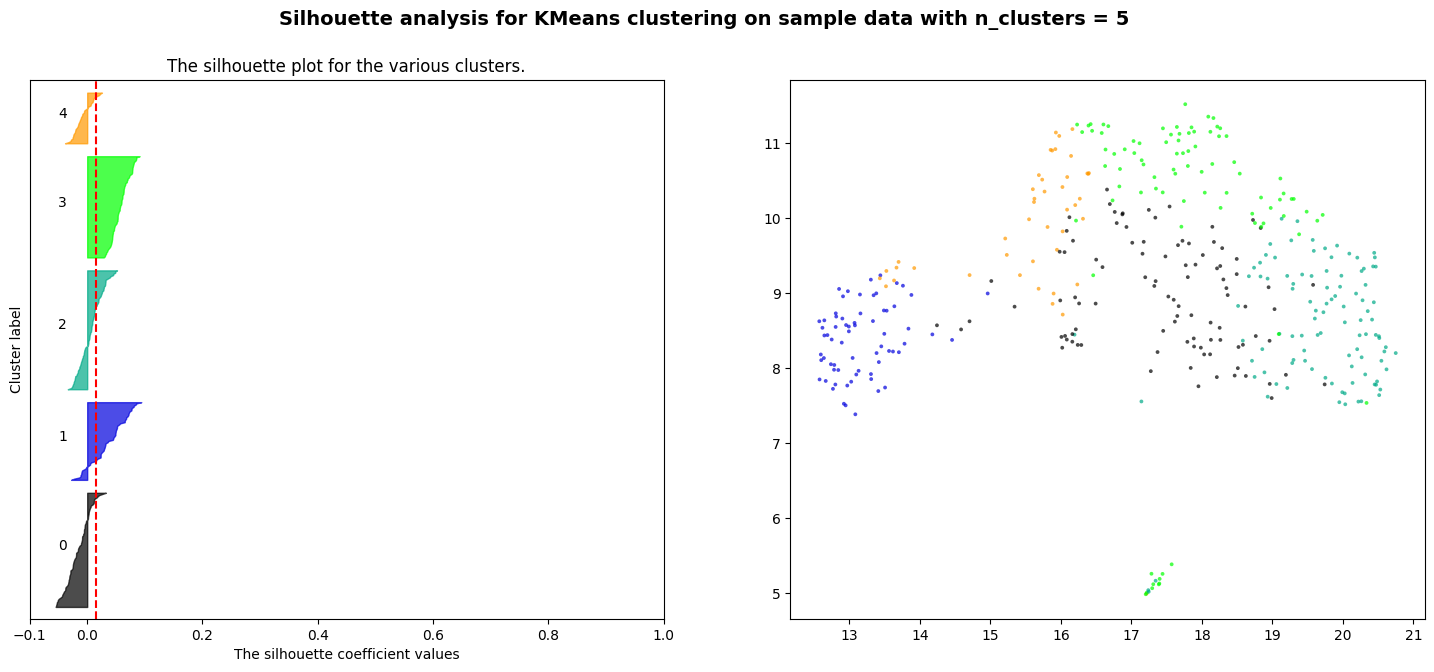

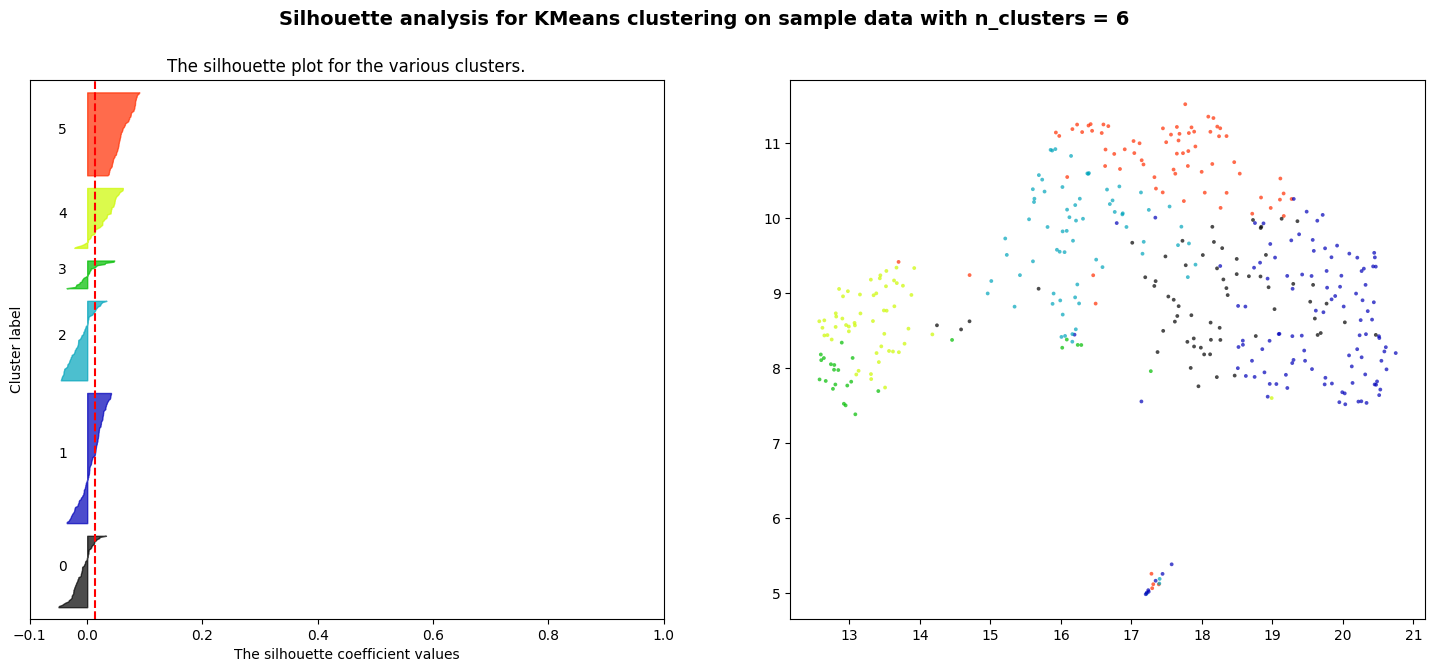

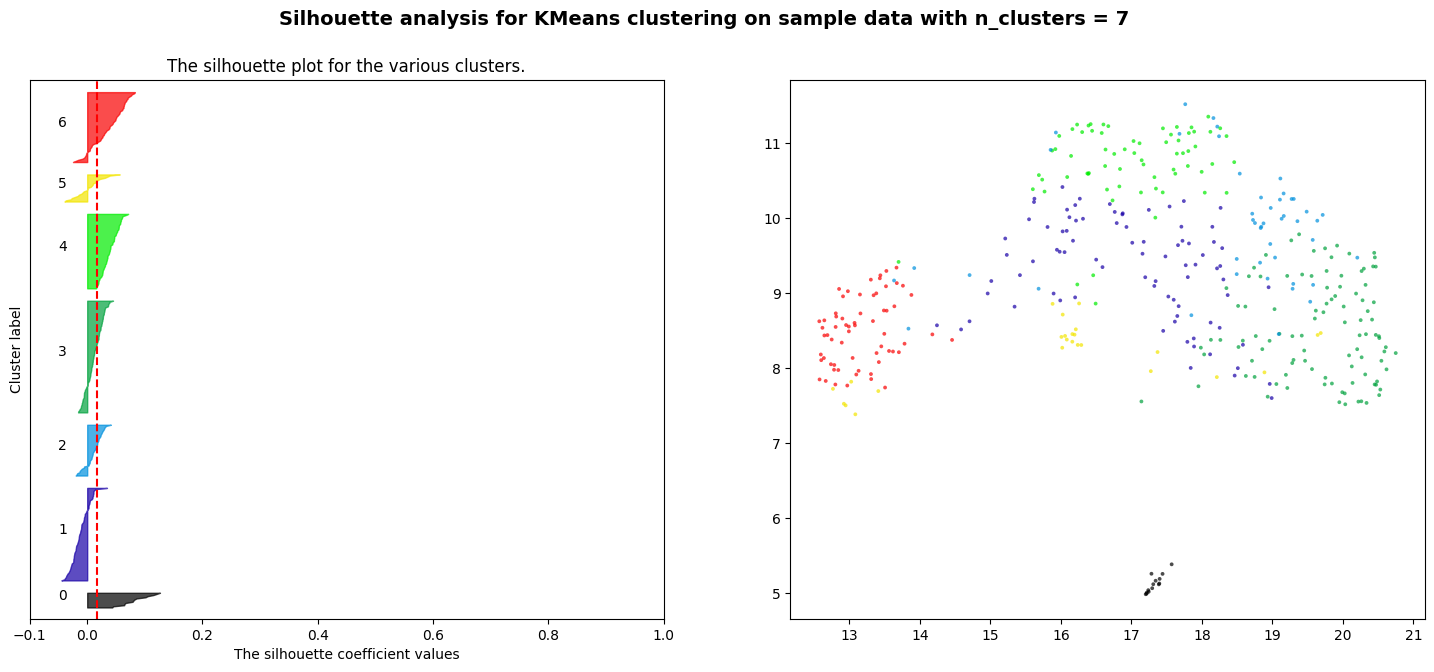

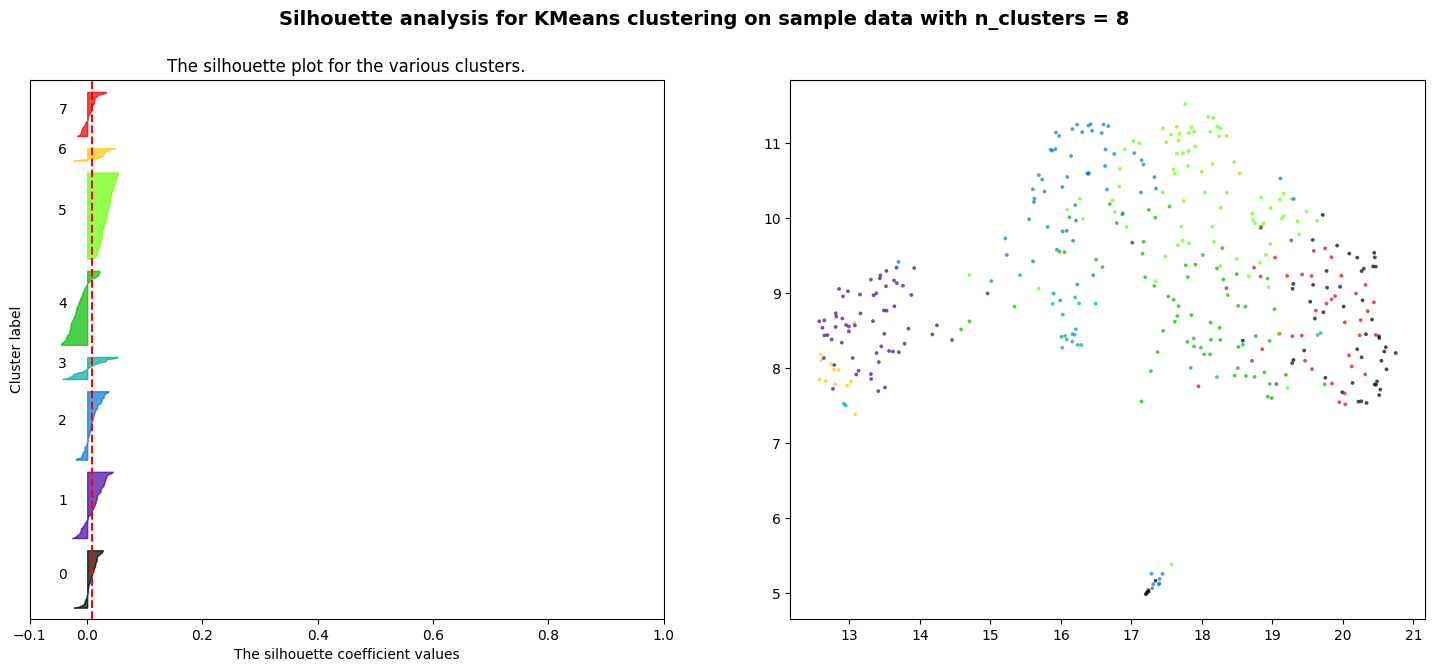

In [609]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score


range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X_train_scaled_filtered) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10, n_init=10)
    cluster_labels = clusterer.fit_predict(X_train_scaled_filtered)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X_train_scaled_filtered, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X_train_scaled_filtered, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        umap_result[:,0], umap_result[:,1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

# Dependencies

In [14]:
### print package versions
if True:
#if False:
    print('\n'.join(f'{m.__name__}=={m.__version__}' for m in globals().values() if getattr(m, '__version__', None)))



pandas==1.5.3
numpy==1.23.5
